<a href="https://colab.research.google.com/github/Wilyam08/RS_ML_1/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


In [13]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
path = '/content/gdrive/MyDrive/Colab Notebooks/train.csv'
titanic_data = pd.read_csv(path, index_col = 0)


In [6]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

У нас есть синтетическая база данных пассажиров титаника с 11 колонками. Данные по пассажиру включают столбец "Выжил/ не вижил", где 1 означает положительный исход. Далее идет информацию о классе каюты, имени и фамилии, поле, возрасте, количестве братьев и сестер, количестве детей и родителей, номер билета, стоимость билета, номер каюты и место посадки на борт (первая буква порта). 

# Data quality assessment

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Видно, что всего строк 100_000. Заметим, что пропущены некоторые данные в стобце возраст, билет, стоимость билета и в столбце место посадки. Более значительные проблемы с столбцом "Cabin": там лишь около 32 тысячы из 100_000 значений присутствует.

Среди столбцов есть столбцы с данными переменными фиксированного класса: Survived, Sex, Embarked, порядковые переменные включают Pclass, а числовые переменные включают PassengerId, Age, SibSp, Parch, Fare.

В Sex данные по полу в рамках: male, female.
Класс каюты согласно данным может быть либо 1, либо 2, либо 3.
Порт-пасадки указан первой буквой порта:S', 'C', 'Q'.

In [10]:
titanic_data.duplicated().value_counts()

False    100000
dtype: int64

В наборе данных содержится 100_000 строк данных, которые не повторяются.

In [11]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000




*   Из 100_000 пассажиров, совершивших эту поездку, 42,77% выжили.
*   Среди всех пассажиров самому младшему всего 0,08 года, самому старшему - 87 лет, а средний возраст - около 39 лет.


*   В среднем каждого пассажира сопровождают 0,398 брата и сестры и 0,45 родителей и детей.
*   Пассажиры потратили на эту поездку в среднем 43,93 доллара США, максимум 744,66 доллара США.






Заполним возраст средним по всем данным.

In [14]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean()).astype(np.int64)

# Data exploration

Посмотрим на распределения данных, которые имеем.

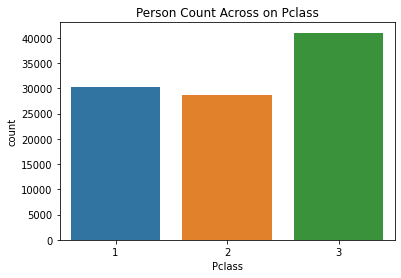

In [16]:
sns.countplot(x='Pclass',data=titanic_data)
plt.title('Person Count Across on Pclass')
 
plt.show()

Окей, людей, которые имели 3 класс каюты - больше всего.

In [17]:
print(pd.pivot_table(titanic_data, index = 'Pclass', values = 'Fare', aggfunc = 'mean'))

             Fare
Pclass           
1       92.653113
2       25.756003
3       20.618226


В среднем каюты 3 класса и стоили дешевле.


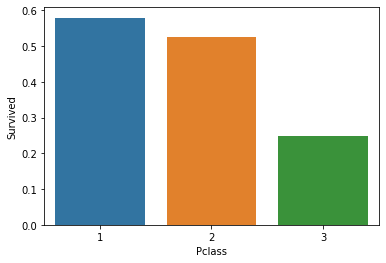

In [19]:
sns.barplot (data = titanic_data, x = "Pclass", y = "Survived", ci = None) # ci означает доверительный интервал
 
plt.show()

А вот выживаемость тех, кто занимал каюту класса 3, меньше почти в два раза выживаемости кают других классов. У первого наибольшая, немногим меньше у кают второго класса.

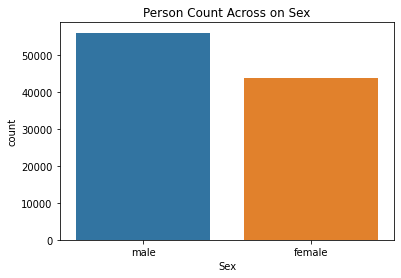

In [48]:
sns.countplot(x='Sex',data=titanic_data)
plt.title('Person Count Across on Sex')
 
plt.show()

Мужчин было больше на тысяч 12.

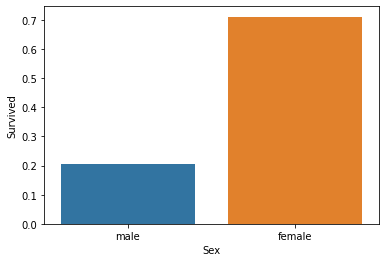

In [21]:
sns.barplot(data=titanic_data,x='Sex',y='Survived',ci=None) 
 
plt.show()

Как видно, ДиКаприо сыграл довольно распространненого героя в этом плане. Выживаемость у мужчин намного меньше.

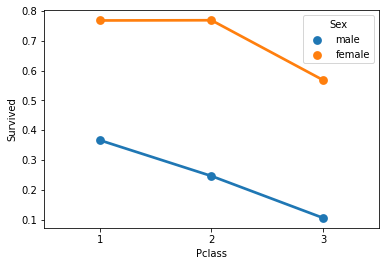

In [23]:
sns.pointplot(data=titanic_data,x='Pclass',y='Survived',hue='Sex',ci=None)
 
plt.show()

Леди в первых двух классах имеют практически одинаковую выживаемость, в третьем было проблемотичнее, но все равно: выжило больше половины. А вот мужчинам следовало бы выбивать каюту классом повыше, шанс падал примерно на 10 процентных пункта с каждым переходом между классами.


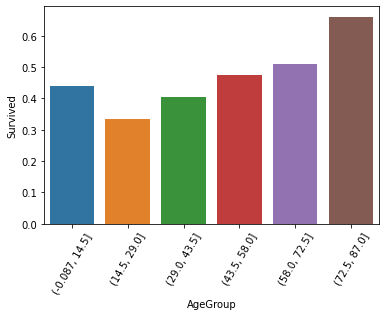

In [32]:
titanic_data ['AgeGroup'] = pd.cut (titanic_data ['Age'], 6) 
titanic_data.AgeGroup.value_counts(sort=False)
sns.barplot(data=titanic_data,x='AgeGroup',y='Survived',ci=None)
plt.xticks (rotation=60)
 
 
plt.show()

Как правило, спасали детей и стариков.

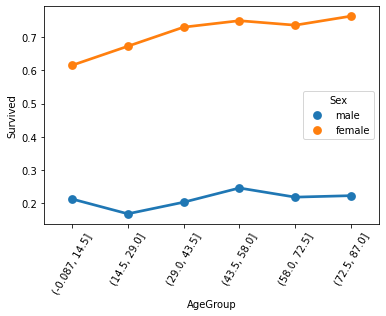

In [35]:
sns.pointplot(data=titanic_data,x="AgeGroup",y="Survived",hue="Sex",ci=None)
             
plt.xticks(rotation=60)
 
plt.show()

Детский либо подростковый возраст не помогал мальчикам. Они разделяли общую долю мужчин на корабле. Выживаемость девушек по группам возраста имеет положительную тенденцию. Женщина растет - растет желание жить у девушки. А мужчин словно с 0 лет учат интересному "благородству".

In [36]:
pd.pivot_table(titanic_data, index = 'Survived', values =['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,36.746304,32.647516,0.435379,0.403348
1,40.467597,59.025192,0.480222,0.390120


В среднем, если ты заплатил больше - больше шанс выжить(больше заплатил - лучше класс каюты).

In [37]:
print(pd.pivot_table(titanic_data, index = 'Survived', columns = 'Embarked', values = 'Name', aggfunc = 'count'))
print(pd.pivot_table(titanic_data, index = 'Sex', columns = 'Embarked', values = 'Name', aggfunc = 'count'))

Embarked      C     Q      S
Survived                    
0          5518  2186  49394
1         16669  3238  22745
Embarked      C     Q      S
Sex                         
female    15786  3852  24117
male       6401  1572  48022


Больше всего не повезло тем, кто сел на борт в Саутгемптоне. Понятно почему, там попала на борт основная масса мужчин (благородных). А наименее благородные в Шербуре?

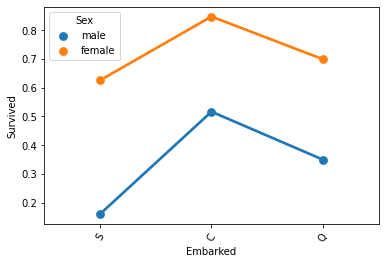

In [38]:
sns.pointplot(data=titanic_data,x="Embarked",y="Survived",hue="Sex",ci=None)
             
plt.xticks(rotation=60)
 
plt.show()

Да, именно там! Причем, как мужчины, так и женщины имели большее желание жить.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


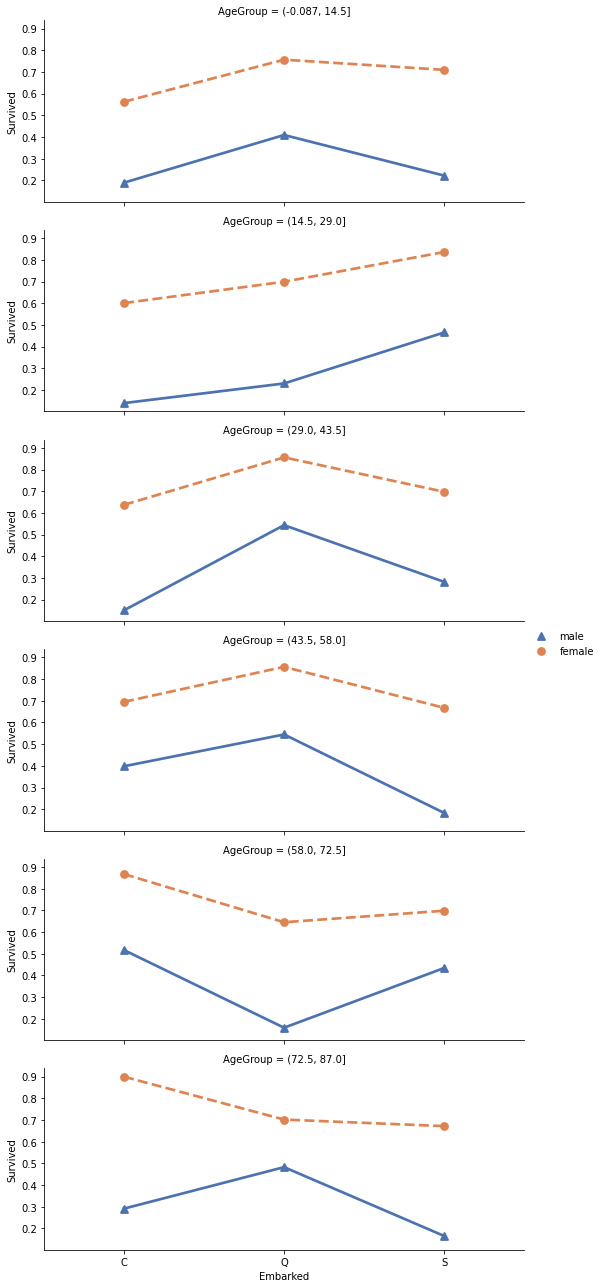

In [44]:
sns.FacetGrid(data=titanic_data,row="AgeGroup",aspect=2.5)\
.map(sns.pointplot,"Embarked","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()
 
plt.show()

И да, начинали ценить жизнь мужчины в этом городе с 40 лет.

In [41]:
print(pd.pivot_table(titanic_data, index = 'Pclass', columns = 'Sex', values = 'Name', aggfunc = 'count'))

Sex     female   male
Pclass               
1        16084  14231
2        15283  13396
3        12519  28487


В третьем классе мужчин было больше, чем в других классах(которые в среднем благородны. Понятно, почему такая невыживаемость, связанная с классом. Или это класс влиял на то, что мы считаем мужчин такими благородными?

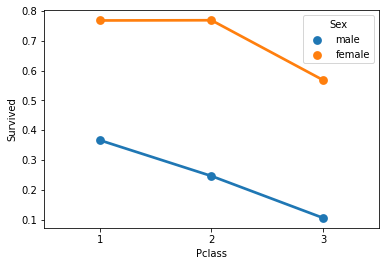

In [42]:
sns.pointplot(data=titanic_data,x='Pclass',y='Survived',hue='Sex',ci=None)
 
plt.show()

Все-таки в 3 классе действительно было сложнее всем. 

In [47]:

print(pd.pivot_table(titanic_data, index = 'Pclass', columns = 'Embarked', values = 'Name', aggfunc = 'count'))

Embarked      C     Q      S
Pclass                      
1         11843  3751  14635
2          6156   844  21609
3          4188   829  35895


А наибольшая доля "первоклассных" садилась именно во французском городе.

# Summary

Размер выборки - 100_000. После кораблекрушения выжило 42,77%

На Титанике есть три типа кают: первый, второй и третий класс, среди которых первый класс имеет самую высокую вероятность выживания, за ним следует второй класс, а третий класс имеет самую низкую вероятность.

Мужчин на борту было больше примерно на 12 тысяч. Выживаемость женщин намного выше, чем у мужчин. Видно, что женщины с большей вероятностью выживут в этой аварии, чем мужчины, что указывает на то, что в этой аварии был применен принцип «дамы прежде всего».

В принципе, касаемо выживаемости слегка соблюдался принцип "любить детей и уважать стариков". 

Люди, которые сели в Шербуре, имели большую выживаемость. Связано с тем, что наибольшая доля "первоклассников" была именно с этого города.